# Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment



Traffic accidents is one of the problems that we face in our daily life. In order to decrease the accidents and their results, drivers should be well trained and examined. Therefore, driving is not allowed without a driving license. using data of driving licenses and traffic accidents, we will find associations that can lead us to solutions.


## Executive Summary

In this project we worked on two data sets: driving licenses, and traffic accidents, and we find some associations that we build our recommendations on top of, to find solutions. We  find that the number of accidents is decreasing through the years while the number of license is increasing, which is a very good indicator. We also find that there is a huge difference  between the three largest regions in Saudi Arabia and the other regions.


### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Imports

In [602]:

import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math



## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data

In [517]:
#Code
accidents = pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv', delimiter=";")
licenses = pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv', delimiter=";")

#### 2. Display data

Print the first 10 rows of each dataframe

In [518]:
#Code

accidents.head(10)


,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [519]:
licenses.head()

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"


In [520]:
licenses['Year'].unique()


array(['(2012)', '(1994)', '(1998)', '(2004)', '(2005)', '(2008)',
       '(2014)', '(2013)', '(2000)', '(2007)', '(1995)', '(1996)',
       '(2015)', '(2010)', '(2001)', '(2017)', '(2009)', '(1993)',
       '(1997)', '(1999)', '(2003)', '(2016)', '(2011)', '(2006)',
       '(2002)'], dtype=object)

In [521]:
accidents['Year'].unique()

array(['(2016)', '(2017)'], dtype=object)

#### 3. Data Description

We have two datasets that related to traffic. Traffic accidents, and license. They have number of shared feeatures which are year, region, and geo-point. license dataset has the number of licens issued as a feature. while accidents dataset has the number of accidents and the indicator as features.
both data sets have the data for all 12 region of Saudi arabia. license dataset has these data from 1993 to 2017, while the accidents dataset has the data of 2016 and 2017 only.




#### 4. Check how complete is the data?

Investigate missing values .. etc.

In [522]:
accidents.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

In [523]:
#Code
licenses.isnull().sum()

Unnamed: 0              0
Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

Check the minimum and maximum possible value for each dataset

In [524]:
#Code
print ("licenses min: ")

print (licenses.min())

print ("licenses max: ")

print (licenses.max())

print ("accidents min: ")

print (accidents.min())

print ("accidents max: ")

print (accidents.max())

licenses min: 
Unnamed: 0                   0
Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object
licenses max: 
Unnamed: 0                349
Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object
accidents min: 
Unnamed: 0                     0
Unnamed: 0.1                   0
Year                      (2016)
Region                  Al-Baaha
Indicator       No. of Accidents
Value                      1007n
dtype: object
accidents max: 
Unnamed: 0                               83
Unnamed: 0.1                             83
Year                                 (2017)
Region                                Total
Indicator       No. of Casualties - Injured
Value                                99925n
dtype: object


#### 5. Display the data types of each feature. 

In [525]:
#code

accidents.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
Unnamed: 0      84 non-null int64
Unnamed: 0.1    84 non-null int64
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: int64(2), object(5)
memory usage: 4.7+ KB


In [526]:
licenses.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
Unnamed: 0             350 non-null int64
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


#### * Value and Driving Liceses should be numbers not objects.

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [527]:
def toint(datacol):
    return datacol.notnull().apply(lambda col: int(col) )
  

- Make new columns `x` and `y` using `geo_point_2d`

In [528]:
accidents['X'] = accidents[accidents["geo_point_2d"].notnull()]["geo_point_2d"].apply(lambda col: float(col.split(",")[0]) )
accidents['Y'] = accidents[accidents["geo_point_2d"].notnull()]["geo_point_2d"].apply(lambda col: float(col.split(",")[1]) )


licenses['X'] = licenses[licenses["geo_point_2d"].notnull()]["geo_point_2d"].apply(lambda col: float(col.split(",")[0]) )
licenses['Y'] = licenses[licenses["geo_point_2d"].notnull()]["geo_point_2d"].apply(lambda col: float(col.split(",")[1]) )


accidents.head()


,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d,X,Y
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334",21.628963,41.263690
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439",23.288331,50.147830
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394",27.901655,37.259858
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508",27.400846,41.440696
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508",27.400846,41.440696


- Fix values preventing converting columns to int.

In [529]:
#code

licenses['Year'] = licenses[licenses["Year"].notnull()]["Year"].apply(lambda r: (r.replace("(" ,"")))
licenses['Year'] = licenses[licenses["Year"].notnull()]["Year"].apply(lambda r: (r.replace( ")","")))

licenses['Driving Liceses'] = licenses[licenses["Driving Liceses"].notnull()]["Driving Liceses"].apply(lambda r: int(r.replace("n","")))


accidents['Year'] = accidents[accidents["Year"].notnull()]["Year"].apply(lambda r: (r.replace("(","")))
accidents['Year'] = accidents[accidents["Year"].notnull()]["Year"].apply(lambda r:(r.replace(")","")))



accidents['Value'] = accidents[accidents["Value"].notnull()]["Value"].apply(lambda r: int(r.replace("n","")))

#r= toint(licenses['X'])


#print(licenses['Year'][0])
#print(accidents['Year'][0])

- Finish data modifications by making sure the columns are now typed appropriately.

In [530]:
#code



accidents = accidents.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','geo_point_2d' ])


accidents.head()



,Year,Region,Indicator,Value,X,Y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


In [531]:

licenses = licenses.drop(columns=['Unnamed: 0','geo_point_2d'])
licenses.head()


,Year,Administritive Area,Driving Liceses,X,Y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369
2,1998,Makkah,86082,21.628963,41.26369
3,2004,Makkah,86636,21.628963,41.26369
4,2005,Makkah,65099,21.628963,41.26369


- Display the data types again to confirm they are correct.

In [532]:
licenses.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null int64
X                      325 non-null float64
Y                      325 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 13.8+ KB


In [533]:
#Code:
accidents.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
Year         84 non-null object
Region       84 non-null object
Indicator    84 non-null object
Value        84 non-null int64
X            78 non-null float64
Y            78 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.0+ KB


#### 7. Rename columns
Change the names of the columns to more expressive names so that we can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. We will be combining these two datasets, and so we should name columns in an appropriate way.

**Steps**:
- Column names should be all lowercase.
- Column names should not contain spaces.
- Column names should be unique and informative.
- Fix  typos in the column names.

In [534]:
licenses.columns.values

array(['Year', 'Administritive Area', 'Driving Liceses', 'X', 'Y'],
      dtype=object)

In [535]:
accidents.columns.values

array(['Year', 'Region', 'Indicator', 'Value', 'X', 'Y'], dtype=object)

In [536]:
#code

c=0
for n in licenses.columns.values:
    licenses.columns.values[c] = n.replace(' ', '_').lower()
    c=c+1
    
licenses.rename(columns={'administritive_area':'region','driving_liceses':'driving_licenses'}, 
                 inplace=True)
licenses.columns.values

array(['year', 'region', 'driving_licenses', 'x', 'y'], dtype=object)

In [537]:
u= 0
for m in accidents.columns.values:
    accidents.columns.values[u] = m.replace(' ', '_').lower()

    u=u+1
accidents.columns.values

array(['year', 'region', 'indicator', 'value', 'x', 'y'], dtype=object)

#### 8. Create a data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|object|Driving_Licenses|the year when the license was issued 
|region|object|Driving_Licenses|the region where the license was issued| 
|driving_liceses|int|Driving_Licenses|The licese number| 
|geo_point_2d|object|Driving_Licenses|The location of the region| 
|X|float|Driving_Licenses|x value of the position| 
|Y|float|Driving_Licenses|y value of the position| 
|year|object|Traffic Accidents|the year when the license was issued 
|region|object|Traffic Accidents|the region where the license was issued| 
|indicator|object|Traffic Accidents|The licese number|
|value|int|Driving_Licenses|The licese number| 
|geo_point_2d|object|Traffic Accidents|The location of the region | 
|X|float|Traffic Accidents|x value of the position| 
|Y|float|Traffic Accidents|y value of the position| 


#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
Total
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions 

In [538]:
licenses.columns

Index(['year', 'region', 'driving_licenses', 'x', 'y'], dtype='object')

In [539]:
accidents.columns

Index(['year', 'region', 'indicator', 'value', 'x', 'y'], dtype='object')

In [540]:
accidents.columns = ['year', 'region', 'indicator', 'value', 'x', 'y']

In [541]:
licenses.columns = ['year', 'region', 'driving_licenses', 'x', 'y']

In [542]:
#code

Agrouped_by_region = accidents.groupby('region').sum()
Agrouped_by_region


,value,x,y
region,,,
Al-Baaha,7585,120.890435,248.799291
Al-Jouf,22948,179.806467,237.342223
Asir,64649,114.832708,257.648820
Eastern Region,194094,139.729984,300.886981
Hail,21847,164.405074,248.644176
Jazan,53480,103.243388,255.915484
Madinah,39048,149.565207,236.950942
Makkah,307269,129.773777,247.582139
Najran,8267,110.706602,281.213097


In [543]:
Lgrouped_by_region = licenses.groupby('region').sum()
Lgrouped_by_region

,driving_licenses,x,y
region,,,
Al-Baha,117051,503.710146,1036.663712
Al-Jouf,164652,749.193614,988.925928
Al-Qaseem,562292,654.917659,1083.574996
Assir,490615,478.469619,1073.536751
Eastern,2147243,582.208268,1253.695756
Hail,257782,685.021143,1036.017401
Jazan,214066,430.180785,1066.314519
Madinah,349084,623.188363,987.295593
Makkah,2433659,540.724069,1031.592246


In [544]:

accidents = accidents.drop((accidents[accidents['region'] == "Total"]).index)

AU = accidents['region'].unique()
AU

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Al-Baaha', 'Riyadh', 'Madinah', 'Qassim',
       'Najran', 'Asir'], dtype=object)

In [545]:
licenses = licenses.drop((licenses[licenses['region'] == "Total"]).index)

LU = licenses['region'].unique()
LU

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Riyadh'], dtype=object)

In [546]:
for r in AU:
    if r not in LU:
        print (r)

Eastern Region
Al-Baaha
Qassim
Asir


In [547]:
#licenses = licenses.drop((licenses[licenses['region'] == "Total"]).index)
#accidents['region'] = accidents[accidents["region"]== 'Eastern Region']["region"].apply(lambda r: (r.replace("Eastern Region","Eastern")))
accidents = accidents.replace("Eastern Region","Eastern")
accidents = accidents.replace("Al-Baaha","Al-Baha")
accidents = accidents.replace("Qassim","Al-Qaseem")
accidents = accidents.replace("Asir","Assir")

In [548]:
LU = licenses['region'].unique()
AU = accidents['region'].unique()


for r in AU:
    if r not in LU:
        print (r)

#### 10 Check data formats


In [549]:
#code
# licenses is long
licenses.head()

,year,region,driving_licenses,x,y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369
2,1998,Makkah,86082,21.628963,41.26369
3,2004,Makkah,86636,21.628963,41.26369
4,2005,Makkah,65099,21.628963,41.26369


In [550]:
# accidents is long .
accidents.head()

,year,region,indicator,value,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


####  Changing formats
Transform the datasets to the same format before merging in the next step.

In [551]:
#code
# change accedents to wide

wide_accedents = pd.pivot_table(accidents, columns=['indicator'], values='value', index=['year','region'],  fill_value=np.nan)

wide_accedents = wide_accedents.reset_index()

wide_accedents.head(12)


indicator,year,region,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2016,Al-Baha,3618,185,1227
1,2016,Al-Jouf,10212,245,920
2,2016,Al-Qaseem,25664,397,1513
3,2016,Assir,32684,983,2541
4,2016,Eastern,101619,1113,4893
5,2016,Hail,10199,299,932
6,2016,Jazan,25873,514,2259
7,2016,Madinah,14475,822,4184
8,2016,Makkah,134838,2243,12383
9,2016,Najran,3235,173,706


#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key.

In [552]:
#code

both = pd.merge(licenses,wide_accedents, on=['region','year'], how='outer')
c=0
for n in both.columns.values:
    both.columns.values[c] = n.replace(' ', '_').lower().replace('.', '').replace('-', '')
    #both.columns.values[c] = n.replace('.', '')

    c=c+1
    
both.head()

,year,region,driving_licenses,x,y,no_of_accidents,no_of_casualties__dead,no_of_casualties__injured
0,2012,Makkah,143954,21.628963,41.26369,NaN,NaN,NaN
1,1994,Makkah,75349,21.628963,41.26369,NaN,NaN,NaN
2,1998,Makkah,86082,21.628963,41.26369,NaN,NaN,NaN
3,2004,Makkah,86636,21.628963,41.26369,NaN,NaN,NaN
4,2005,Makkah,65099,21.628963,41.26369,NaN,NaN,NaN


#### 12. Saveing  cleaned, merged dataframe

In [3]:

export_csv = both.to_csv (r'combined_datasets.csv', index = None, header=True) 


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [554]:
#Code:

bothT = (both.describe()).transpose()
bothT


,count,mean,std,min,25%,50%,75%,max
driving_licenses,325.0,28915.347692,47419.058819,915.000000,4846.000000,10267.000000,25423.000000,495307.000000
x,325.0,23.810447,4.197987,17.207231,20.148406,23.288331,27.400846,30.197075
y,325.0,42.602789,3.254196,37.259858,41.263690,41.817119,43.343000,50.147830
no_of_accidents,26.0,38225.692308,46493.705035,1414.000000,10276.250000,16050.500000,30981.250000,145541.000000
no_of_casualties__dead,26.0,635.384615,549.783381,112.000000,241.250000,415.500000,929.250000,2243.000000
no_of_casualties__injured,26.0,2743.038462,2922.641127,374.000000,923.000000,1618.500000,3784.000000,12383.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [555]:
print (np.mean([2,5,6,7]))

5.0


In [556]:
def s(col):
    m = np.mean(list(col))
    #print ("mean = " +  str(m) )
    #print ("len = " +  str(len(col)) )

    seg=0
    n= len(col)
    for x in col:
        v= x-m
        p = math.pow(v,2)
        seg =seg + p
    out = math.sqrt(1/n*(seg))
    return out

columns = both.columns.values


    

In [557]:
both.columns

Index(['year', 'region', 'driving_licenses', 'x', 'y', 'no_of_accidents',
       'no_of_casualties__dead', 'no_of_casualties__injured'],
      dtype='object')

In [588]:
#Code:
both.columns = ['year', 'region', 'driving_licenses', 'x', 'y','no_of_accidents', 'no_of_casualties__dead',
       'no_of_casualties__injured']



b_dict ={columns[atr]:s(both[both[columns[atr]].notnull()][columns[atr]]) for atr in range (2, len(columns))}
b_dict

{'driving_licenses': 47346.0502174464,
 'x': 4.191524025811858,
 'y': 3.2491853051316917,
 'no_of_accidents': 45590.82869880505,
 'no_of_casualties__dead': 539.1069593406002,
 'no_of_casualties__injured': 2865.885411322023}

In [560]:
num_dict ={columns[atr]:np.std(both[both[columns[atr]].notnull()][columns[atr]]) for atr in range (4, len(columns))}
num_dict

{'y': 3.24918530513169,
 'no_of_accidents': 45590.82869880505,
 'no_of_casualties__dead': 539.1069593406002,
 'no_of_casualties__injured': 2865.885411322023}


#### My manually calculated standard deviations doesnt exactly match up with the output from pandas describe but it matchs numpy's std method:


In [561]:
b_dict ={columns[atr]:np.std(both[both[columns[atr]].notnull()][columns[atr]]) for atr in range (4, len(columns))}
b_dict

{'y': 3.24918530513169,
 'no_of_accidents': 45590.82869880505,
 'no_of_casualties__dead': 539.1069593406002,
 'no_of_casualties__injured': 2865.885411322023}

#### Investigate trends in the data
Answer the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?


In [637]:
#Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)

print ("highest = " + str(both.loc[both['driving_licenses'] == both['driving_licenses'].max()].region))
print ("lowest = " + str(both.loc[both['driving_licenses'] == both['driving_licenses'].min()].region))



highest = 271    Riyadh
Name: region, dtype: object
lowest = 191    Tabouk
Name: region, dtype: object


In [563]:
#Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)

s16to17 = pd.DataFrame(both.loc[(both['year'] == '2016' ) | (both['year'] == '2017' )])
means16to17 = s16to17.groupby('region').mean()
h = pd.DataFrame(means16to17.loc[means16to17['no_of_accidents'] == means16to17['no_of_accidents'].max()])
print ("highest mean Traffic Accidents numbers for years (2016 - 2017) : " + str(h.index[0]))
l = pd.DataFrame(means16to17.loc[means16to17['no_of_accidents'] == means16to17['no_of_accidents'].min()])
print ("lowest mean Traffic Accidents numbers for years (2016 - 2017) : " + str(l.index[0]))

highest mean Traffic Accidents numbers for years (2016 - 2017) : Makkah
lowest mean Traffic Accidents numbers for years (2016 - 2017) : Al-Baha


In [564]:
#What are the regions that have more Driving Licenses issued in each year than the year average?

DLmean =  np.mean(list(both['driving_licenses']))
yearmean = both.groupby('year').mean()
yearmean= yearmean.reset_index()

regions = both['region'].unique()

topR =list(regions)

for r in regions:
    crgn = both.loc[(both['region'] == r )]
    crgn = crgn.reset_index()
    #in each region , check if it have more Driving Licenses issued in each year than the year average
    for index, row in crgn.iterrows():
        #print(row['year'])
        cym = yearmean.loc[yearmean['year'] == row['year']].driving_licenses
        #print(cym)
        if (row['driving_licenses'] <= float(cym)):
            #print(row['region'])
            topR.remove(row['region'])
            break

topR

['Makkah']

In [565]:
#What are the regions that have more Traffic Accidents happened in each year than the year average?

ACmean =  np.mean(list(both['no_of_accidents']))
topAc =list(regions)
for r in regions:
    crgn = both.loc[(both['region'] == r )]
    crgn = crgn.reset_index().fillna(0)
    #in each region , check if it have more accidents in each year than the year average
    for index, row in crgn.iterrows():
        #print(row['year'])
        cym = yearmean.loc[yearmean['year'] == row['year']].no_of_accidents
        #print(cym)

        if (row['driving_licenses'] <= float(cym)):
                #print(row['region'])
            topAc.remove(row['region'])
            break

topR

['Makkah']

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.


#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

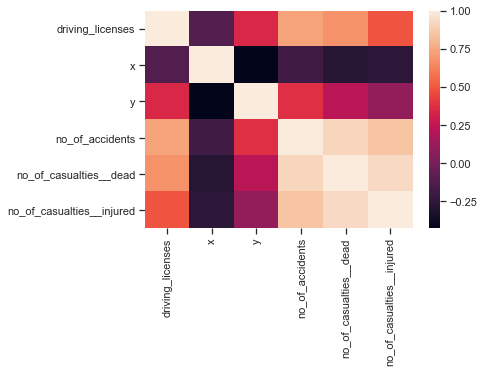

In [566]:
sns.heatmap(both.corr())

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

Here's some starter code:

In [567]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2) )# Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

C:\Users\baso0\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\baso0\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


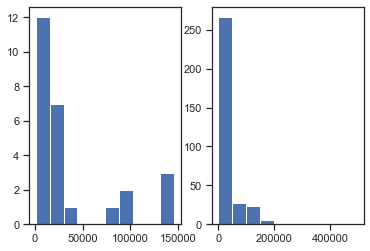

In [568]:
# Code

subplot_histograms(both, ['no_of_accidents','driving_licenses'], ['no_of_accidents','driving_licenses'], ['no_of_accidents','driving_licenses'])

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn


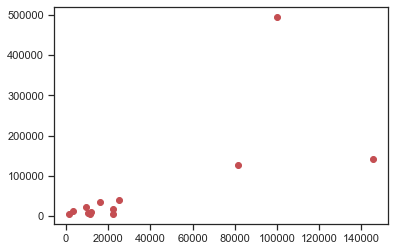

In [569]:
# Code

#- Driving Licenses vs. Traffic Accidents for 2017
y2017 = both.loc[(both['year'] == '2017' )]

plt.plot(y2017['no_of_accidents'], y2017['driving_licenses'], 'ro')
plt.show()

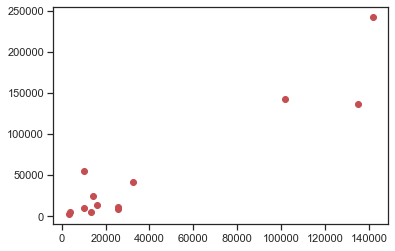

In [570]:
# Code

#- Driving Licenses vs. Traffic Accidents for 2016
y2016 = both.loc[(both['year'] == '2016' )]

plt.plot(y2016['no_of_accidents'], y2016['driving_licenses'], 'ro')
plt.show()

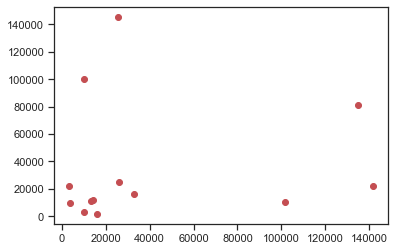

In [571]:
# Code

#- Driving Licenses vs. Traffic Accidents for 2017
y2017 = both.loc[(both['year'] == '2017' )]

plt.plot(y2016['no_of_accidents'], y2017['no_of_accidents'], 'ro')
plt.show()

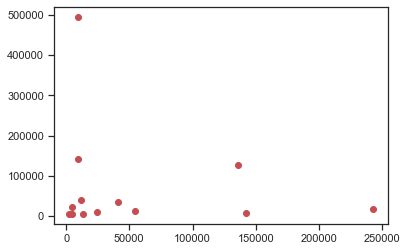

In [572]:
# Code

#- Driving Licenses vs. Traffic Accidents for 2016
y2016 = both.loc[(both['year'] == '2016' )]

plt.plot(y2016['driving_licenses'], y2017['driving_licenses'], 'ro')
plt.show()

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [573]:
# Code

import seaborn as sns
import matplotlib.pyplot as plt



[(0, 100000)]

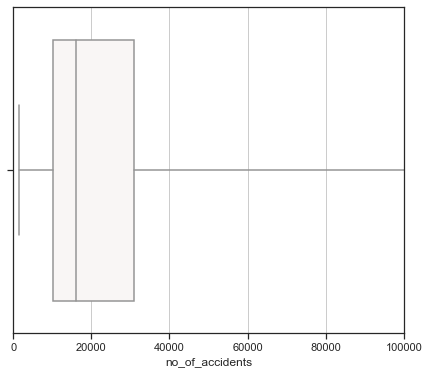

In [574]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="no_of_accidents", data=both, whis="range", palette="vlag")


# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(xlim=(0, 100000))


[(0, 100000)]

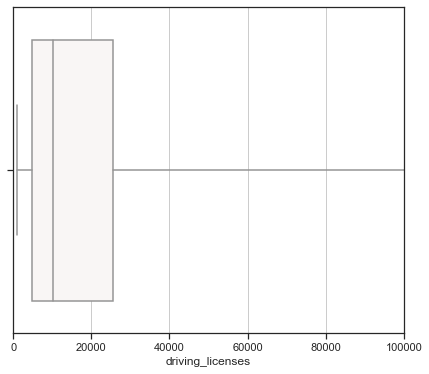

In [575]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="driving_licenses", data=both, whis="range", palette="vlag")


# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(xlim=(0, 100000))
#ax.set(ylabel="")
#sns.despine(trim=True, left=True)

[(0, 10000)]

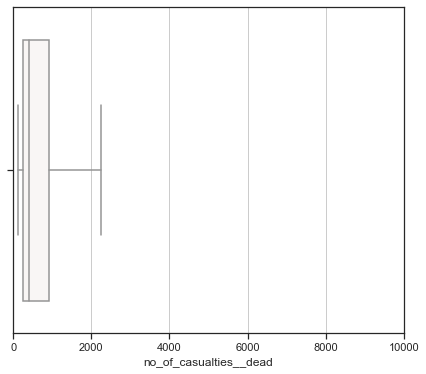

In [576]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="no_of_casualties__dead", data=both, whis="range", palette="vlag")


# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(xlim=(0, 10000))
#ax.set(ylabel="")
#sns.despine(trim=True, left=True)

[(0, 10000)]

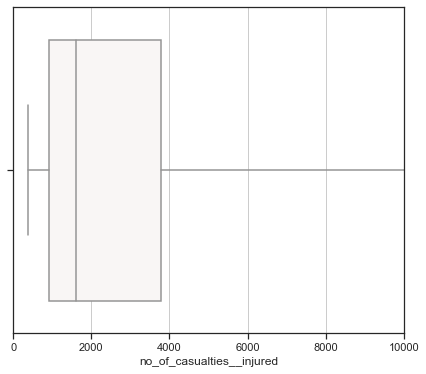

In [577]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="no_of_casualties__injured", data=both, whis="range", palette="vlag")


# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(xlim=(0, 10000))
#ax.set(ylabel="")
#sns.despine(trim=True, left=True)

### Additional plots 

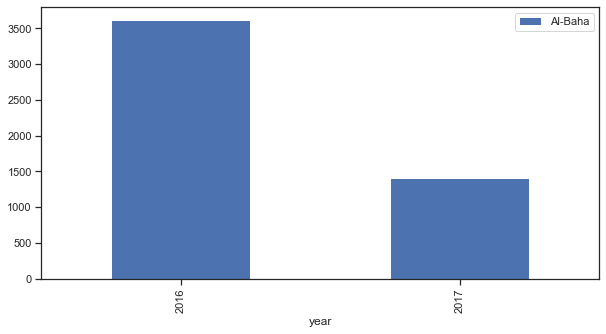

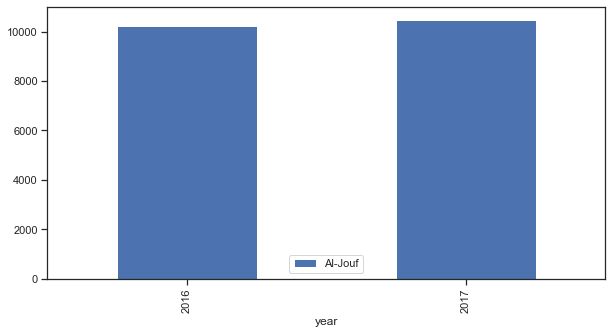

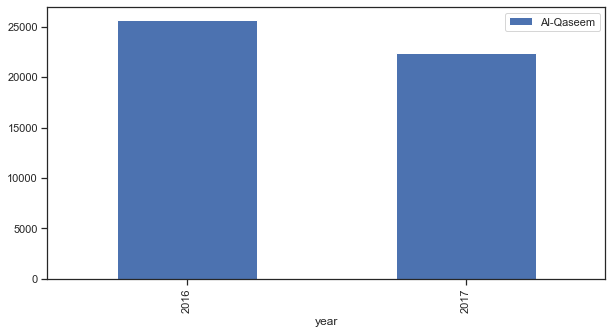

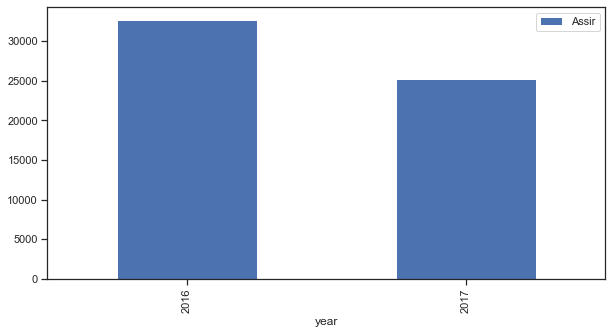

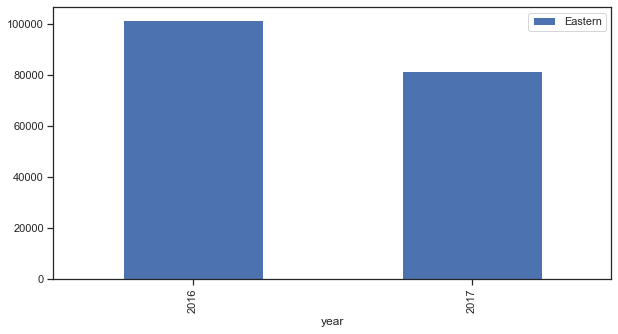

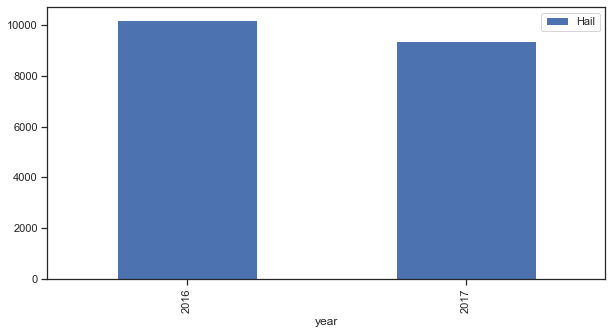

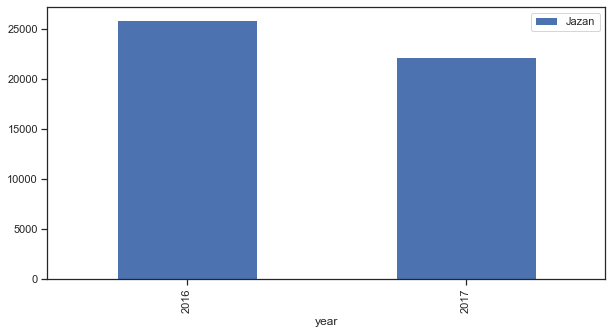

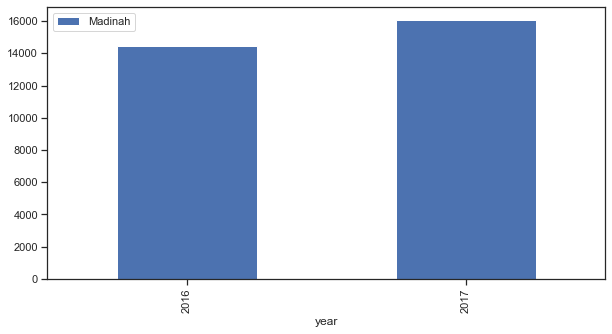

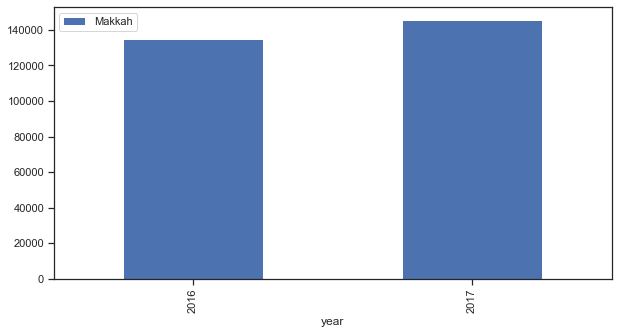

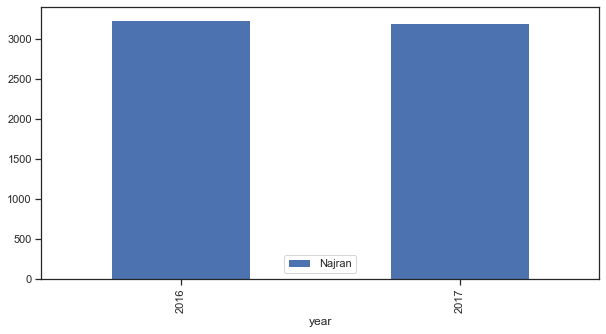

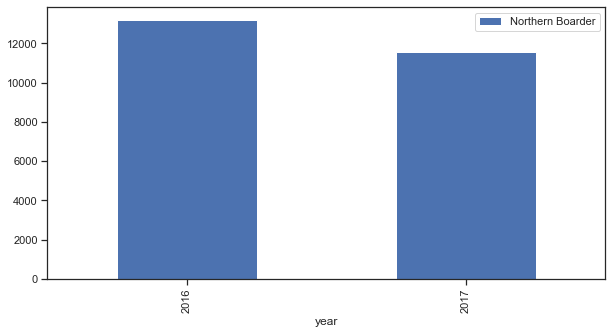

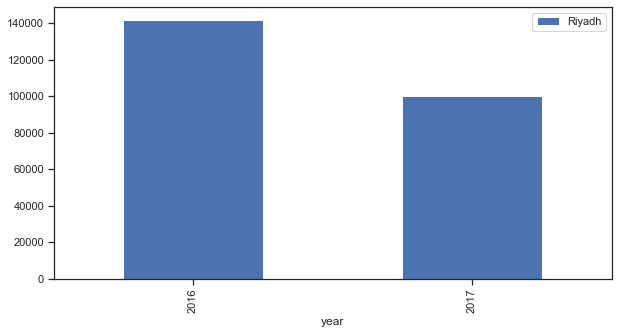

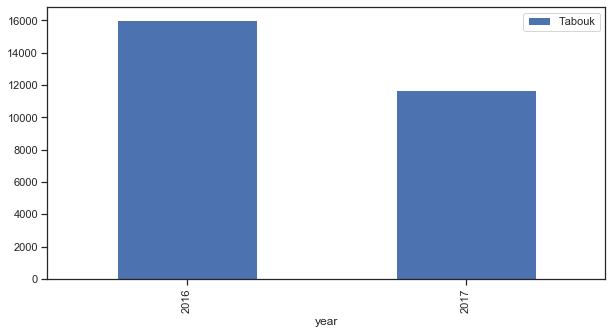

In [636]:
C = both.pivot_table(index='region',columns='year', values='no_of_accidents')

for index, row in C.iterrows():
    crc = pd.DataFrame(row)
    crc.plot( kind="bar", figsize=(10,5))#for ind in range (12):



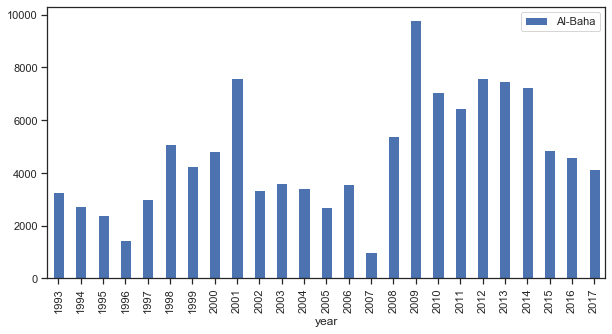

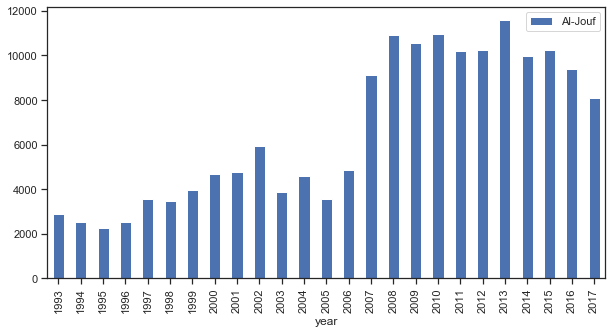

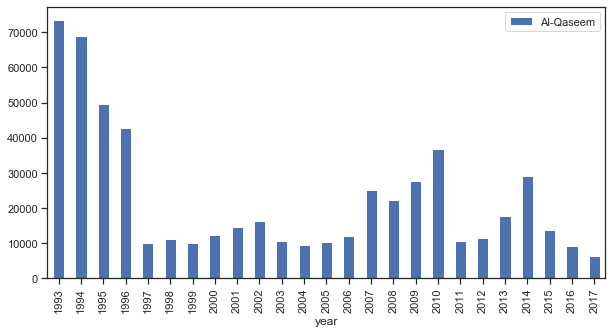

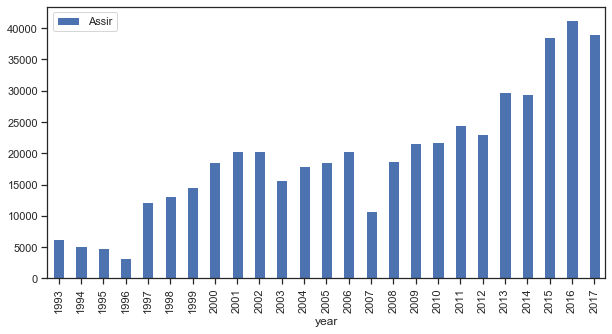

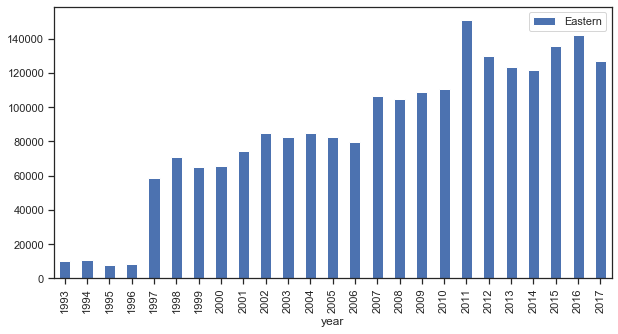

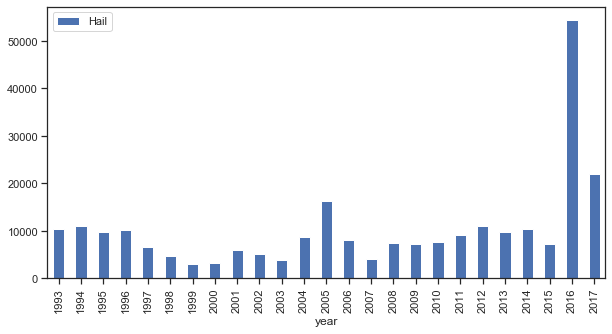

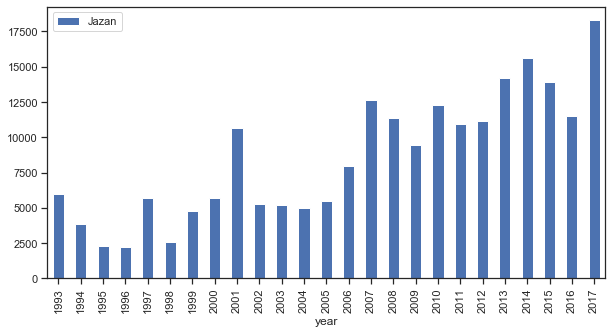

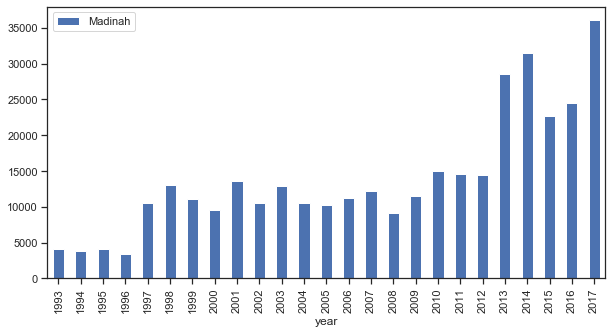

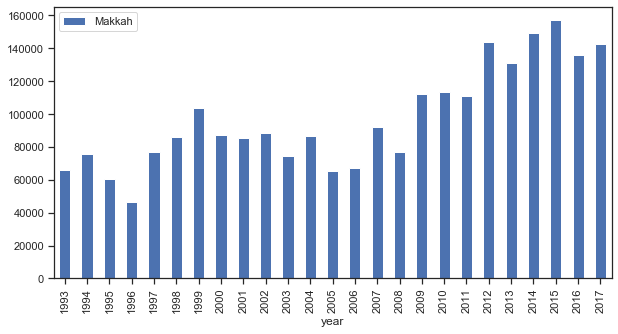

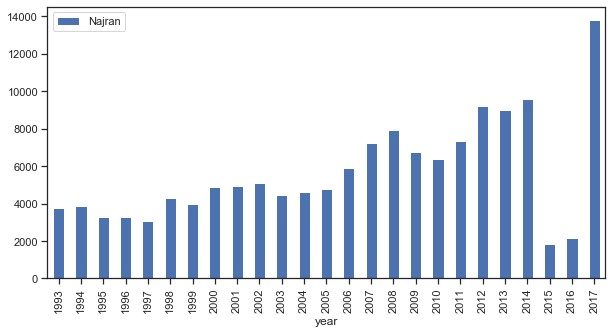

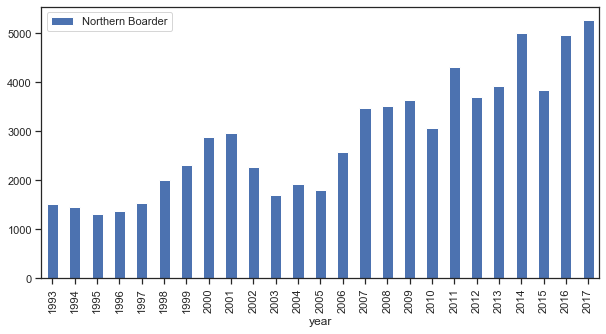

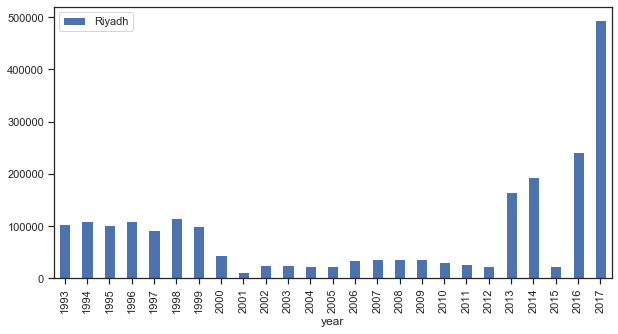

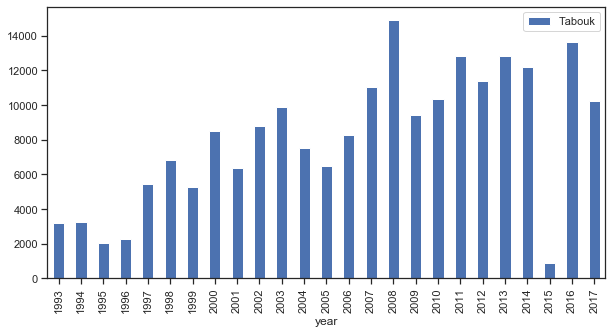

In [735]:

C = both.pivot_table(index='region',columns='year', values='driving_licenses')

for index, row in C.iterrows():
    crc = pd.DataFrame(row)
    crc.plot( kind="bar", figsize=(10,5))#for ind in range (12):



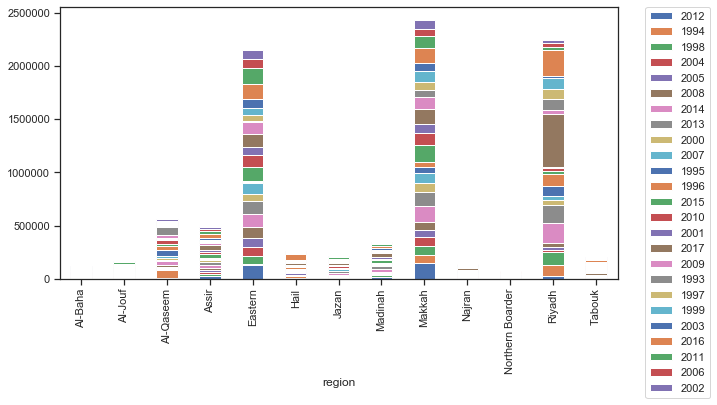

In [595]:

DF = both.pivot_table(index='region',columns='year', values='driving_licenses')
DF = DF.reset_index()


DF.plot(x="region", y=both['year'].unique(), kind="bar",stacked= True, figsize=(10,5),)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

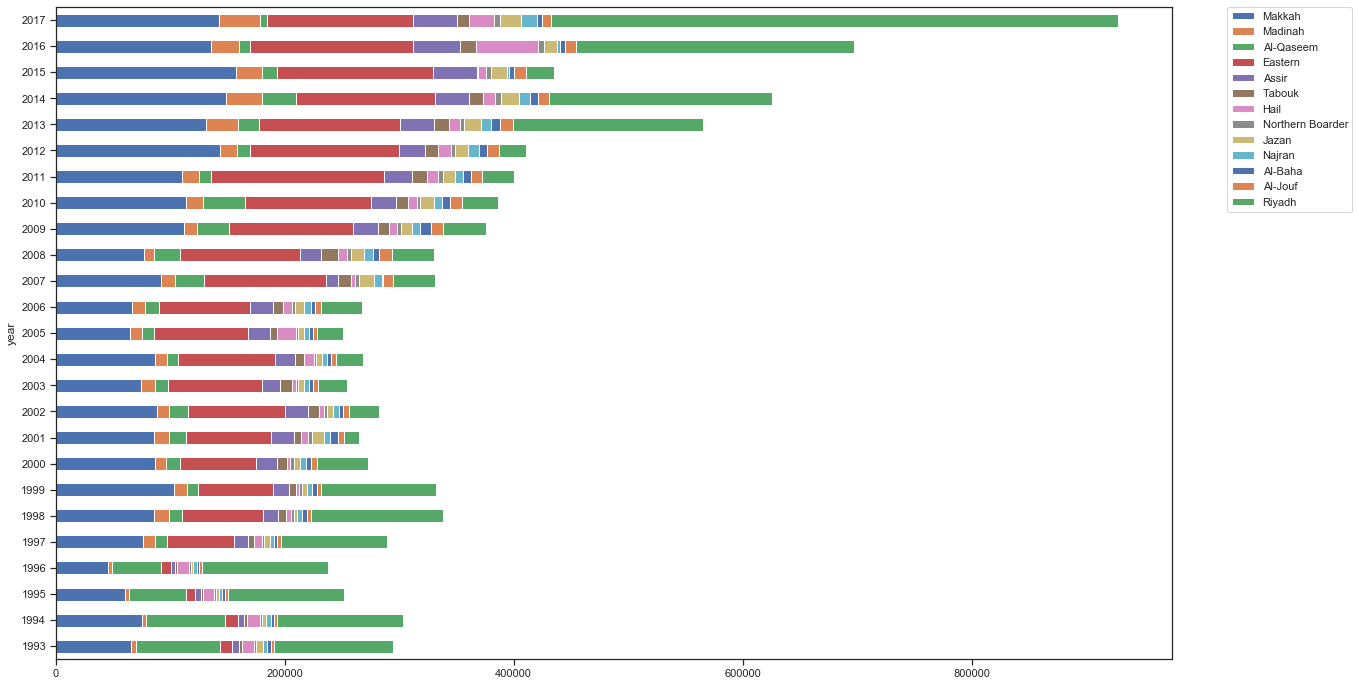

In [743]:

DF = both.pivot_table(index='year',columns='region', values='driving_licenses')
DF = DF.reset_index()


DF.plot(x='year', y= both['region'].unique(), kind="barh", stacked= True, figsize=(20,12))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

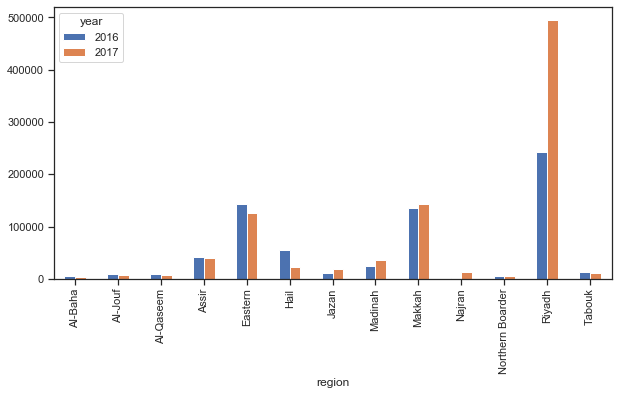

In [580]:

DF = both.pivot_table(index='region',columns='year', values='driving_licenses')
DF = DF.reset_index()


DF.plot(x="region", y=["2016", "2017"], kind="bar", figsize=(10,5))

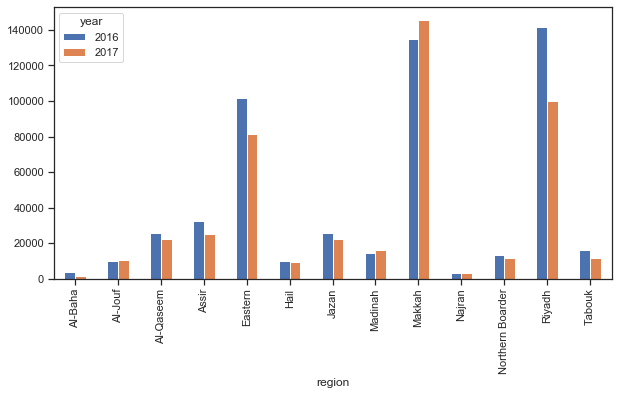

In [581]:
import matplotlib.pyplot as plt
import pandas as pd
DF = both.pivot_table(index='region',columns='year', values='no_of_accidents')
DF = DF.reset_index()


DF.plot(x="region", y=["2016", "2017"], kind="bar", figsize=(10,5))

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

#### Calculate these measures

In [582]:
from scipy import stats


no_of_accidents  mean :  38225.692307692305
no_of_accidents  mode :  [1414.]
no_of_accidents  median :  16050.5
no_of_accidents  standard daviation :  45590.82869880505
no_of_accidents  variance :  2078523661.4437866


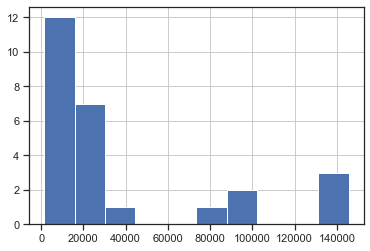

In [592]:
print ("no_of_accidents  mean :  " + str(np.mean(both['no_of_accidents'])))
print ("no_of_accidents  mode :  " + str(stats.mode(both['no_of_accidents'])[0]))
print ("no_of_accidents  median :  " + str(np.median(both[both['no_of_accidents'].notnull()]['no_of_accidents'])))
print ("no_of_accidents  standard daviation :  " + str(np.std(both['no_of_accidents'])))
print ("no_of_accidents  variance :  " + str(np.var(both['no_of_accidents'])))

both['no_of_accidents'].hist()


driving_licenses  mean :  28915.347692307692
driving_licenses  mode :  [915]
driving_licenses  median :  10267.0
driving_licenses  standard daviation :  47346.0502174464
driving_licenses  variance :  2241648471.1929564


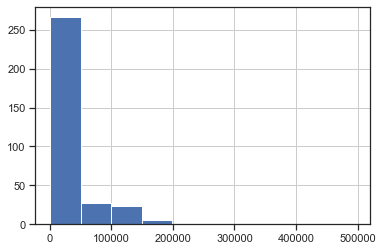

In [590]:
print ("driving_licenses  mean :  " + str(np.mean(both['driving_licenses'])))
print ("driving_licenses  mode :  " + str(stats.mode(both['driving_licenses'])[0]))
print ("driving_licenses  median :  " + str(np.median(both[both['driving_licenses'].notnull()]['driving_licenses'])))
print ("driving_licenses  standard daviation :  " + str(np.std(both['driving_licenses'])))
print ("driving_licenses  variance :  " + str(np.var(both['driving_licenses'])))

both['driving_licenses'].hist()

no_of_casualties__dead  mean :  635.3846153846154
no_of_casualties__dead  mode :  [112.]
no_of_casualties__dead  median :  415.5
no_of_casualties__dead  standard daviation :  539.1069593406002
no_of_casualties__dead  variance :  290636.3136094675


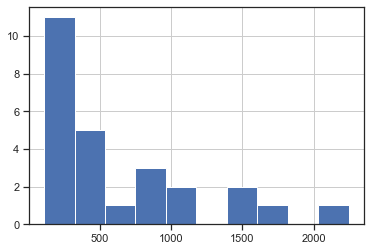

In [591]:
print ("no_of_casualties__dead  mean :  " + str(np.mean(both['no_of_casualties__dead'])))
print ("no_of_casualties__dead  mode :  " + str(stats.mode(both['no_of_casualties__dead'])[0]))
print ("no_of_casualties__dead  median :  " + str(np.median(both[both['no_of_casualties__dead'].notnull()]['no_of_casualties__dead'])))
print ("no_of_casualties__dead  standard daviation :  " + str(np.std(both['no_of_casualties__dead'])))
print ("no_of_casualties__dead  variance :  " + str(np.var(both['no_of_casualties__dead'])))
both['no_of_casualties__dead'].hist()


no_of_casualties__injured  mean :  2743.0384615384614
no_of_casualties__injured  mode :  [374.]
no_of_casualties__injured  median :  1618.5
no_of_casualties__injured  standard daviation :  2865.885411322023
no_of_casualties__injured  variance :  8213299.190828402


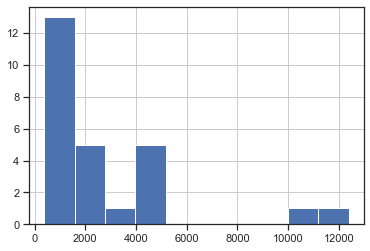

In [589]:
print ("no_of_casualties__injured  mean :  " + str(np.mean(both['no_of_casualties__injured'])))
print ("no_of_casualties__injured  mode :  " + str(stats.mode(both['no_of_casualties__injured'])[0]))
print ("no_of_casualties__injured  median :  " + str(np.median(both[both['no_of_casualties__injured'].notnull()]['no_of_casualties__injured'])))
print ("no_of_casualties__injured  standard daviation :  " + str(np.std(both['no_of_casualties__injured'])))
print ("no_of_casualties__injured  variance :  " + str(np.var(both['no_of_casualties__injured'])))
both['no_of_casualties__injured'].hist()


#### We generally assuming that data we sample from a population will be normally distributed. But our data in general is positively skewed.



<h3> Driving Licenses: </h3>

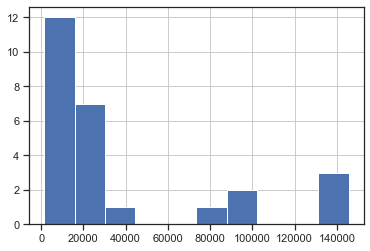


mean :  28915.347692307692
<br>

mode :  ModeResult(mode=array([915], dtype=int64), count=array([1]))
<br>

median :  10267.0
<br>

standard daviation :  47346.0502174464
<br>

variance :  2241648471.1929564


We can ullistat  from these measures that the spread values are remarkably high. It is also skewed to the right, which means the number of instances that hold smaller values are greater than those that holds larger value. in other words: there are small number of regions have a verey large number of licenses, on the other hand, other regions' number of licenses are way smaller,  or there are small number of years where verey large number of licenses issued, while in the rest of the years the number of licenses issued are way smaller.</h5>



<br>

Next plot can give us a better understanding of  the reasons behined this:


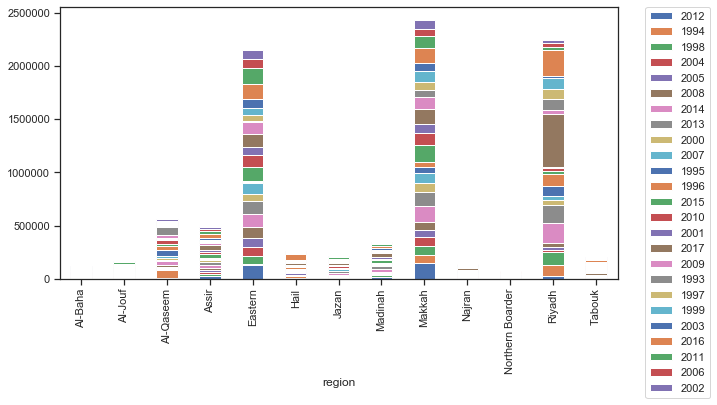

 We can see the huge difference between the number of licenses issued in the big regions (Riyadh, Makkah, Eastren) and the other regions. On the other hand, although there are variances among number of licenses issued in each year, they are less that the variances between regions.As we can see in next plot:

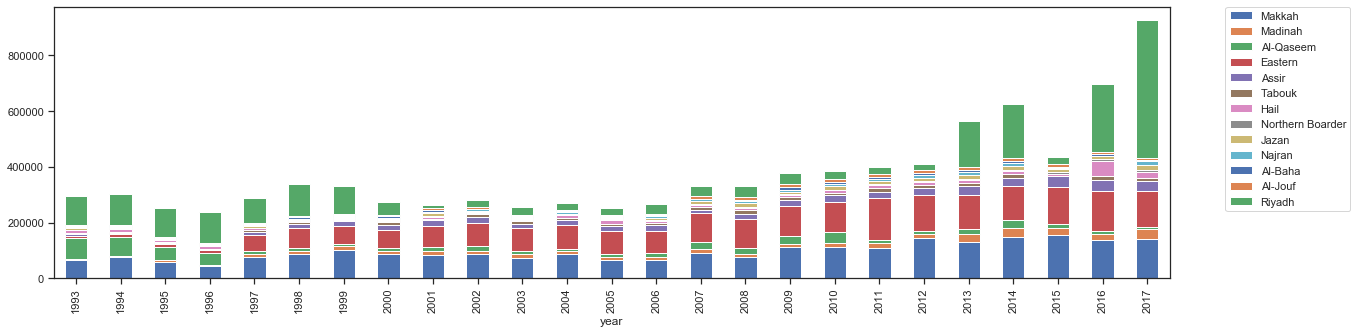

Now we have a good explaination of why the distriputed of our data is highly skewed

<h3> Traffic Accidents: </h3>

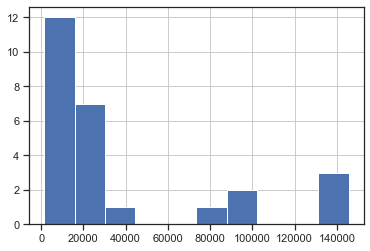


mean :  38225.692307692305
<br>

mode :  ModeResult(mode=array([1414.]), count=array([1]))
<br>

median :  16050.5
<br>

standard daviation :  45590.82869880505
<br>

variance :  2078523661.4437866

Again, here we can see  from these measures that the spread values are also very high. and the dostribution is positively skewed. its also because of the effect of the high values in the main regions compared to the other regions

## Outside Research

Based upon these observations, I chose some regions that demonstrate interesting trends in the number of driving licenses and traffic accidents.

To decide which regions to choose, I needed more data. especially that we only have the data of the accidents for 2 years which is not enough to relay on and I can not extract any trends or pattern from. Therfore, I searched for more data about accidants in Saudi Arabia and did more exploration for better understanding.
<br>

here is the data I got for the previuse years(1):


In [652]:
x_accidents = pd.read_csv('../data/accidents.csv', delimiter=",")
x_accidents

,region,2010,2011,2012,2013,2014,2015
0,Riyadh,131554,121551,165853,152864,125299,138974
1,Makkah,106818,117219,125365,90717,78496,102607
2,Eastern Region,91714,82992,84726,83481,78146,68280
3,Asir,18451,21310,20716,19546,19437,18806
4,Qassim,13190,16962,19604,18302,16961,16924
5,Madinah,12652,14796,18463,15351,15521,14295
6,Tabouk,10500,13235,12953,13944,11812,12137
7,Northern Boarder,7527,8120,10877,10726,9897,11260
8,Al-Jouf,5569,7875,9471,10325,9100,9700
9,Hail,5459,6782,7345,7694,8439,7968


 
pre-processing to prepare for merging:


In [692]:

new_accidents = accidents
new_accidents = accidents.drop(columns=['indicator', 'x','y' ])
new_accidents = pd.pivot_table(new_accidents, columns=['year'], values='value', index=['region'],  fill_value=np.nan)

new_accidents = new_accidents.reset_index()
new_accidents

year,region,2016,2017
0,Al-Baha,1676.666667,851.666667
1,Al-Jouf,3792.333333,3857.000000
2,Al-Qaseem,9191.333333,8056.666667
3,Assir,12069.333333,9480.333333
4,Eastern,35875.000000,28823.000000
5,Hail,3810.000000,3472.333333
6,Jazan,9548.666667,8278.000000
7,Madinah,6493.666667,6522.333333
8,Makkah,49821.333333,52601.666667
9,Najran,1371.333333,1384.333333


In [693]:
new_accidents.columns

Index(['region', '2016', '2017'], dtype='object', name='year')

In [698]:
x_accidents = x_accidents.replace("Eastern Region","Eastern")
x_accidents = x_accidents.replace("Al-Baaha","Al-Baha")
x_accidents = x_accidents.replace("Qassim","Al-Qaseem")
x_accidents = x_accidents.replace("Asir","Assir")

nu = new_accidents['region'].unique()
xu = x_accidents['region'].unique()


for r in nu:
    if r not in xu:
        print (r)

x_accidents

,region,2010,2011,2012,2013,2014,2015
0,Riyadh,131554,121551,165853,152864,125299,138974
1,Makkah,106818,117219,125365,90717,78496,102607
2,Eastern,91714,82992,84726,83481,78146,68280
3,Assir,18451,21310,20716,19546,19437,18806
4,Al-Qaseem,13190,16962,19604,18302,16961,16924
5,Madinah,12652,14796,18463,15351,15521,14295
6,Tabouk,10500,13235,12953,13944,11812,12137
7,Northern Boarder,7527,8120,10877,10726,9897,11260
8,Al-Jouf,5569,7875,9471,10325,9100,9700
9,Hail,5459,6782,7345,7694,8439,7968


### Merge:


In [700]:

N_accidents = pd.merge(x_accidents,new_accidents, on='region', how='outer')
N_accidents

,region,2010,2011,2012,2013,2014,2015,2016,2017
0,Riyadh,131554,121551,165853,152864,125299,138974,49124.333333,35288.000000
1,Makkah,106818,117219,125365,90717,78496,102607,49821.333333,52601.666667
2,Eastern,91714,82992,84726,83481,78146,68280,35875.000000,28823.000000
3,Assir,18451,21310,20716,19546,19437,18806,12069.333333,9480.333333
4,Al-Qaseem,13190,16962,19604,18302,16961,16924,9191.333333,8056.666667
5,Madinah,12652,14796,18463,15351,15521,14295,6493.666667,6522.333333
6,Tabouk,10500,13235,12953,13944,11812,12137,6063.000000,4434.666667
7,Northern Boarder,7527,8120,10877,10726,9897,11260,4673.333333,4008.666667
8,Al-Jouf,5569,7875,9471,10325,9100,9700,3792.333333,3857.000000
9,Hail,5459,6782,7345,7694,8439,7968,3810.000000,3472.333333


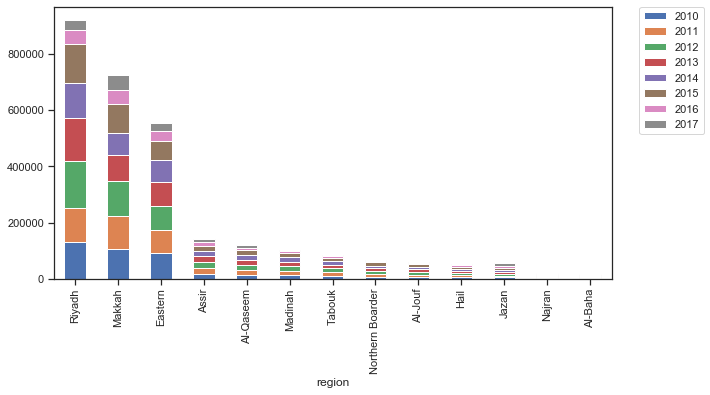

In [729]:
N_accidents = N_accidents.transpose()


N_accidents.plot( kind="bar", figsize=(10,5), stacked =True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


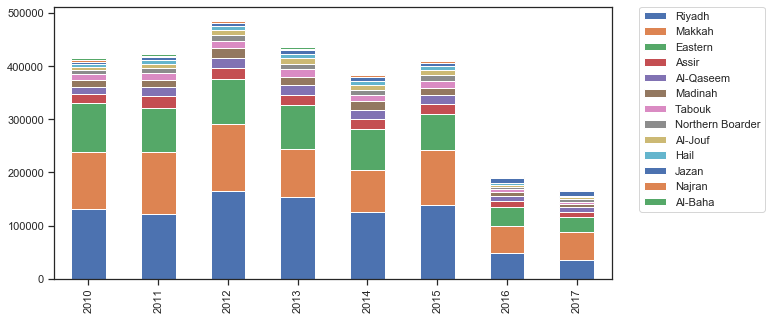

In [730]:
N_accidents = N_accidents.transpose()


N_accidents.plot( kind="bar", figsize=(10,5),stacked =True)#for ind in range (12):
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


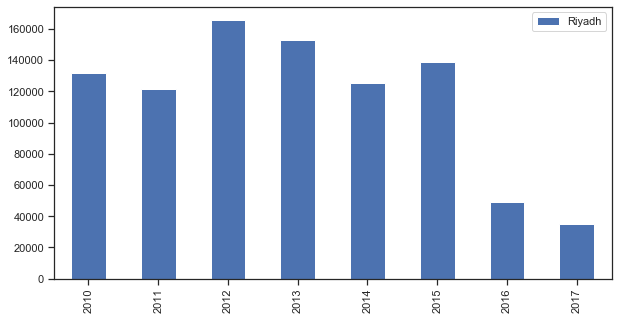

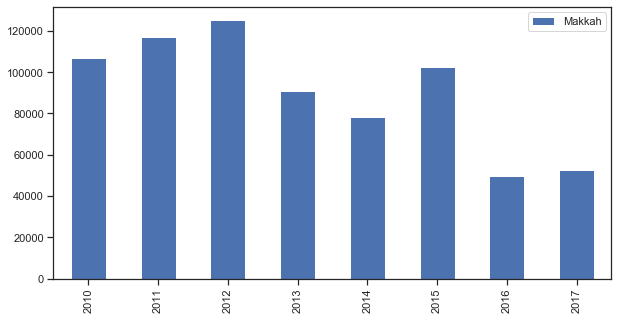

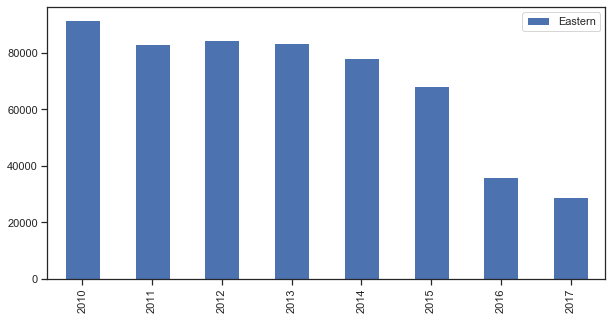

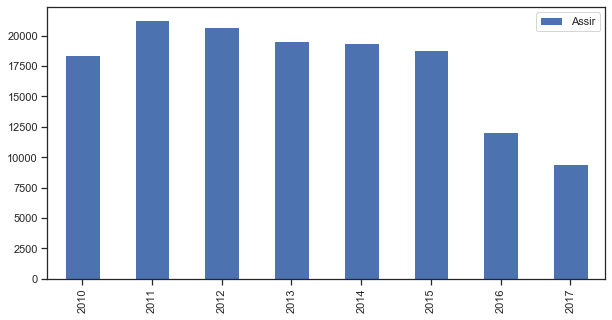

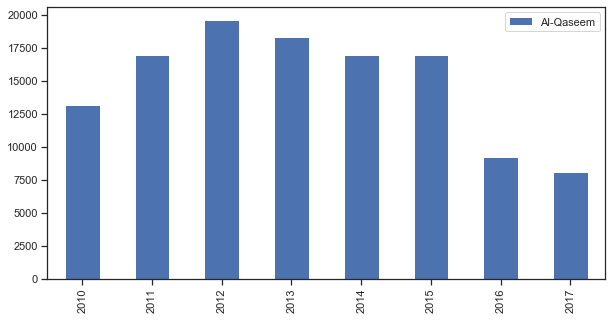

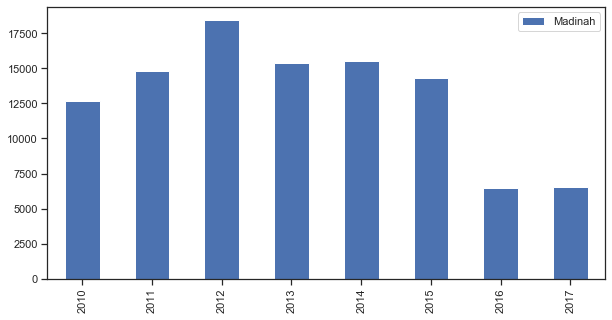

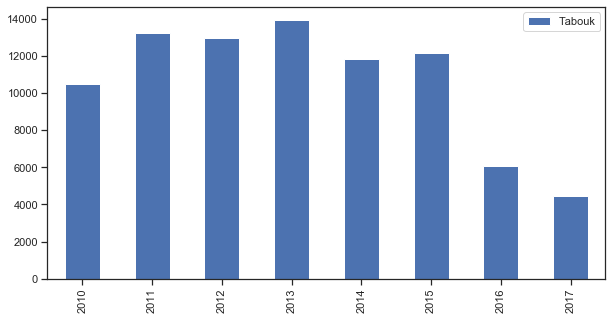

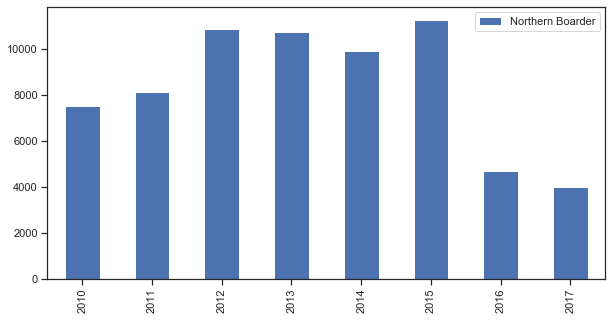

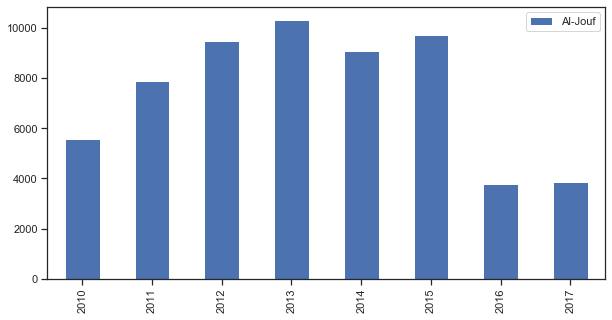

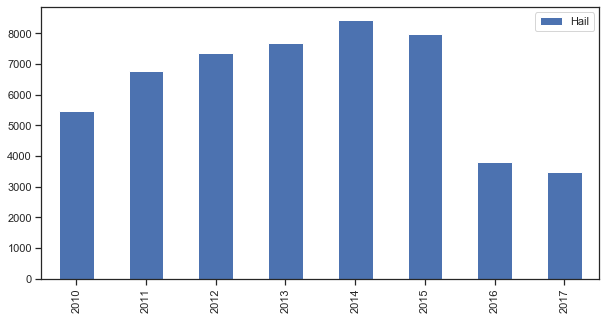

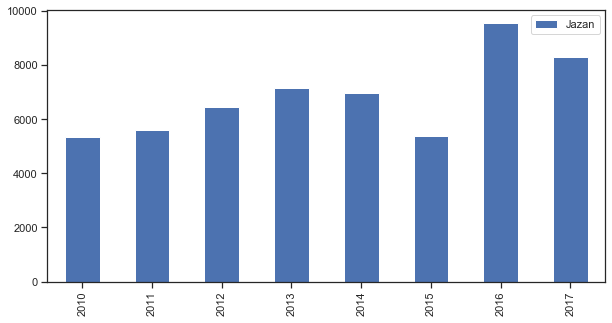

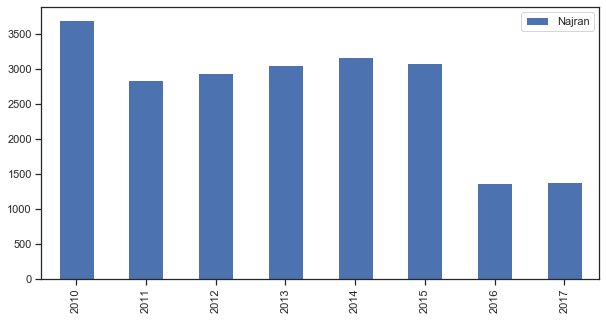

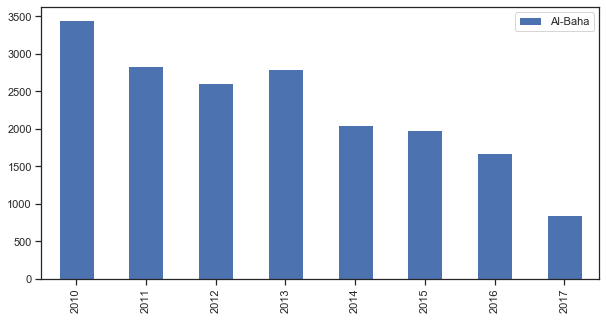

In [739]:

AC = N_accidents.transpose()

for index, row in AC.iterrows():
    crc = pd.DataFrame(row)
    crc.plot( kind="bar", figsize=(10,5))#for ind in range (12):

We can see that the total number of accidents have been dramaticly dicreased after 2015. This might be a result of the new traffic laws is Saudi Arabia(2), that applied in 2016. Since then, the number of accedents droped to half which is very huge change. Likewise, the next plot shows us the effect of these new laws on the number of licens issued:
    
<br>

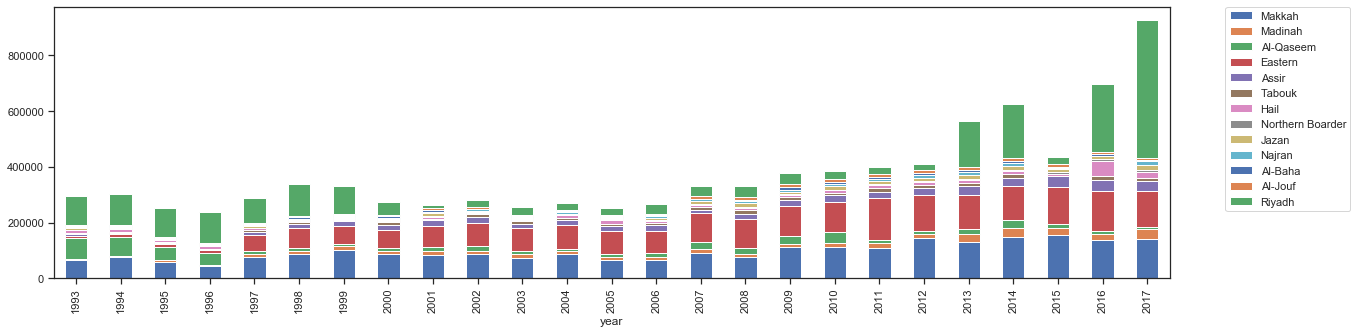



As we can ullistrate from this plot, the number of licences issued grow after 2015 to reach its peak in 2017. It can be noticed that the number of licences issued in Riyadh has the most influence on these changes through the years. 
    
<br>
Based on the above analysis, I chose these regions for the pattern I found in:
<br>

1- Jazan: Unlike other regions, the number of accidents in Jazan have been increased after 2015. We assume that may be related to the unstable security conditions. 
<br>

2- Riyadh: The number of licenses issued in Riyadh has the most influence on these changes through all the years. Moreover, something funny happend to the numbers in 2015! it went very low in unlogical way. The same thing noticed in Tabuk and Najran.
<br>

3- Qaseem: The number of license in Qaseem was dropped to almost half in the mid 90's, we search for a reason but nothing found. It might be because of people leaving to bigger cities for work and study.
<br>

(1) https://www.stats.gov.sa/en/46
<br>

(2) http://saudigazette.com.sa/article/164574


## Conclusions and Recommendations


* I noticed that althogh Makkah and Eastren region are large region with high population, the numbers of licenses does not affected by the new law. We can conclude from this, that we need to have strickt law, and processes that simplefy the way to apply this law.
<br>

* I added more data to the accidents dataset. and if I had time I would search for more data about the number of traffic violations and there types. 
